# AIRLINE PASSENGER SATISFACTION

## Business Understanding

### Business Context
The airline industry is highly competitive, with customer satisfaction being a critical differentiator. This dataset offers valuable insights into the factors that influence passenger experience and overall satisfaction.

### Business Objectives
1. **Customer Retention**
   - Identify key drivers of customer satisfaction
   - Understand differences between loyal and disloyal customers
   - Develop targeted strategies to improve customer loyalty

2. **Service Improvement**
   - Pinpoint specific service areas that most significantly impact satisfaction
   - Prioritize investments in service enhancements
   - Create personalized service strategies for different customer segments

3. **Competitive Positioning**
   - Benchmark service quality against industry standards
   - Develop unique selling propositions based on customer preferences
   - Create targeted marketing and service improvement campaigns

### Key Business Questions
- What factors most strongly correlate with passenger satisfaction?
- How do different customer types (loyal vs. disloyal) perceive airline services?
- Are there significant satisfaction variations across travel classes?
- How do travel purpose and demographics influence satisfaction?
- What is the financial impact of improving low-performing service areas?

### Potential Business Insights
- Impact of in-flight services on overall satisfaction
- Relationship between delay times and customer dissatisfaction
- Importance of digital services (online booking, wifi) in modern travel
- Differences in expectations between business and personal travelers

## Data Understanding

### Dataset Overview
- **Source**: Kaggle
- **Type**: Survey/Satisfaction Data
- **Total Features**: 22 variables
- **Target Variable**: Satisfaction (Binary: Satisfied/Dissatisfied)

### Feature Categories

1. **Demographic Features**
   - Gender: Categorical (Female, Male)
   - Age: Numerical
   - Customer Type: Categorical (Loyal, Disloyal)
   - Type of Travel: Categorical (Personal, Business)
   - Travel Class: Categorical (Business, Eco, Eco Plus)

2. **Service Quality Features** (Rated 0-5)
   - Inflight wifi service
   - Departure/Arrival time convenience
   - Ease of Online booking
   - Gate location
   - Food and drink
   - Online boarding
   - Seat comfort
   - Inflight entertainment
   - On-board service
   - Leg room service
   - Baggage handling
   - Check-in service
   - Inflight service
   - Cleanliness

3. **Operational Features**
   - Flight distance: Numerical
   - Departure Delay in Minutes: Numerical
   - Arrival Delay in Minutes: Numerical

### Data Quality Considerations
- Check for missing values
- Validate rating scales (0-5)
- Examine distribution of categorical variables
- Investigate potential correlations between features
- Assess impact of delay times on satisfaction

In [1]:
# Imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from category_encoders import OneHotEncoder
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, confusion_matrix
import joblib

## DATA PREPARATION

In [2]:
# Create Wrangle function

def wrangle(filepath):

    # Create DataFrame from DataSet
    df = pd.read_csv(filepath)

    # Drop Unnamed: 0 column
    df.drop(columns=["Unnamed: 0"], inplace=True)

    # Drop Arrival Delay in Minutes null values rows
    df.dropna(inplace=True)

    # Drop id column as it has high cardinality thus will add no value to determining satisfaction
    df.drop(columns=["id"], inplace=True)

    # Addressing multicollinearity
    df['Total Flight Delay in Minutes'] = df['Arrival Delay in Minutes'] + df['Departure Delay in Minutes']
    df.drop(columns=['Arrival Delay in Minutes', 'Departure Delay in Minutes'], inplace=True)

    return df

In [3]:
# Wrangle DataSet

df = wrangle("train.csv")
df.head()

Gender      Customer Type  Age   Type of Travel     Class  Flight Distance  \
0    Male     Loyal Customer   13  Personal Travel  Eco Plus              460   
1    Male  disloyal Customer   25  Business travel  Business              235   
2  Female     Loyal Customer   26  Business travel  Business             1142   
3  Female     Loyal Customer   25  Business travel  Business              562   
4    Male     Loyal Customer   61  Business travel  Business              214   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      3                                  4   
1                      3                                  2   
2                      2                                  2   
3                      2                                  5   
4                      3                                  3   

   Ease of Online booking  Gate location  ...  Seat comfort  \
0                       3              1  ...             5   
1                       3              3  ...             1   
2                       2              2  ...             5   
3                       5              5  ...             2   
4                       3              3  ...             5   

   Inflight entertainment  On-board service  Leg room service  \
0                       5                 4                 3   
1                       1                 1                 5   
2                       5                 4                 3   
3                       2                 2                 5   
4                       3                 3                 4   

   Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                 4                4                 5            5   
1                 3                1                 4            1   
2                 4                4                 4            5   
3                 3                1                 4            2   
4                 4                3                 3            3   

              satisfaction  Total Flight Delay in Minutes  
0  neutral or dissatisfied                           43.0  
1  neutral or dissatisfied                            7.0  
2                satisfied                            0.0  
3  neutral or dissatisfied                           20.0  
4                satisfied                            0.0  

[5 rows x 22 columns]

In [4]:
# Printing the shape of my dataframe

df.shape

(103594, 22)

### Data Cleaning

In [5]:
# Checking for duplicates

df.duplicated().sum()

0

In [6]:
# Checking for null values

df.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
satisfaction                         0
Total Flight Delay in Minutes        0
dtype: int64

In [7]:
# Inspect Data in my DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103594 entries, 0 to 103903
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103594 non-null  object 
 1   Customer Type                      103594 non-null  object 
 2   Age                                103594 non-null  int64  
 3   Type of Travel                     103594 non-null  object 
 4   Class                              103594 non-null  object 
 5   Flight Distance                    103594 non-null  int64  
 6   Inflight wifi service              103594 non-null  int64  
 7   Departure/Arrival time convenient  103594 non-null  int64  
 8   Ease of Online booking             103594 non-null  int64  
 9   Gate location                      103594 non-null  int64  
 10  Food and drink                     103594 non-null  int64  
 11  Online boarding                    103594 no

### Checking for low or high cardinality

In [8]:
df.select_dtypes("object").head()

Gender      Customer Type   Type of Travel     Class  \
0    Male     Loyal Customer  Personal Travel  Eco Plus   
1    Male  disloyal Customer  Business travel  Business   
2  Female     Loyal Customer  Business travel  Business   
3  Female     Loyal Customer  Business travel  Business   
4    Male     Loyal Customer  Business travel  Business   

              satisfaction  
0  neutral or dissatisfied  
1  neutral or dissatisfied  
2                satisfied  
3  neutral or dissatisfied  
4                satisfied

In [9]:
df.select_dtypes("object").nunique()

Gender            2
Customer Type     2
Type of Travel    2
Class             3
satisfaction      2
dtype: int64

## Exploratory Data Analysis

#### Age Distribution of Passengers

/home/muruthi/anaconda3/envs/learn-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


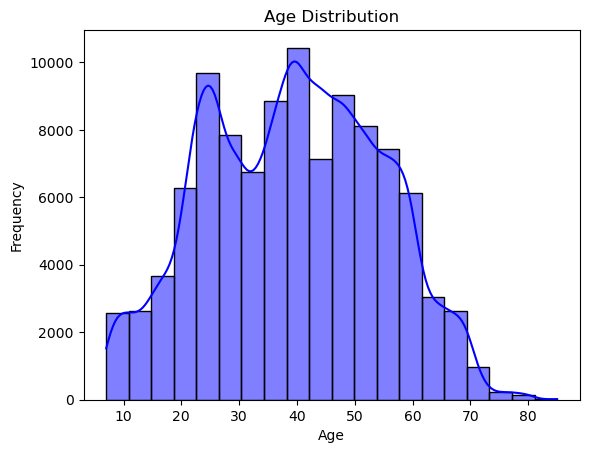

In [10]:
# Let's Take a look at the distribution of age of passengers

sns.histplot(df['Age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show();

#### Gender Distribution of Passengers

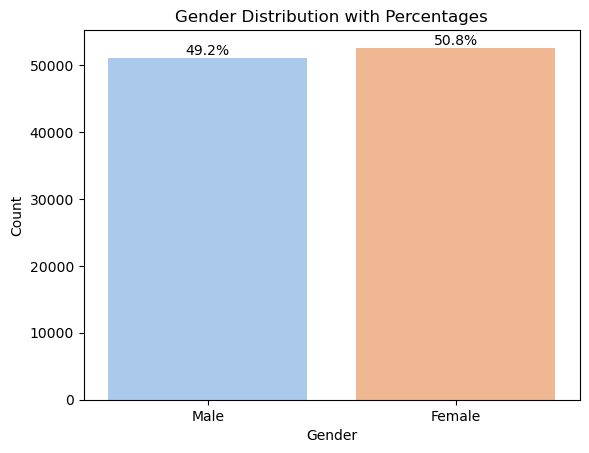

In [11]:
# Plot gender distribution
ax = sns.countplot(data=df, x='Gender', palette='pastel')

# Calculate percentages and add annotations
total = len(df)  # Total number of observations
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'  # Calculate percentage
    x = p.get_x() + p.get_width() / 2  # X position of annotation
    y = p.get_height()  # Y position of annotation
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=10)

# Add titles and labels
plt.title('Gender Distribution with Percentages')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

#### Distribution of Passenger Satisfaction (Target Vector)

/home/muruthi/anaconda3/envs/learn-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


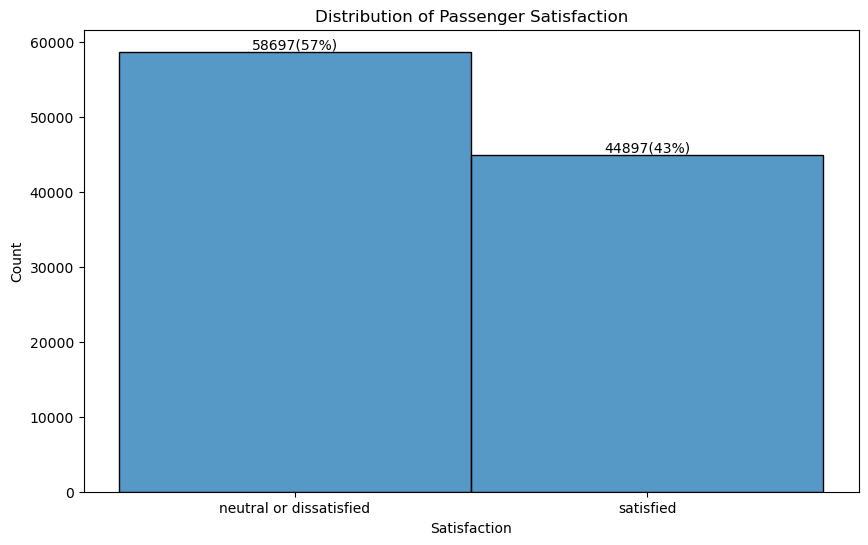

In [12]:
# since I am trying to predict passenger satisfaction. Let's visualize how satisfied the passengers are
# using histogram

# Visualize passenger satisfaction distribution
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=df, x="satisfaction", kde=False, ax=ax)

# Add count and percentage annotations
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.5, 
            f"{int(height)}({height/len(df)*100:.0f}%)", 
            ha="center", va="bottom")

ax.set_xlabel("Satisfaction")
ax.set_ylabel("Count")
ax.set_title("Distribution of Passenger Satisfaction")
plt.show();

#### -> There is no severe class imbalance

#### -> From the above we can see that 57% of the passengers were in the neutral or dissatisfied category. But why?

#### -> Let's look at how passenger satisfaction is correlated to other features

## Are there significant satisfaction variations across travel classes?

#### Distribution of Travel Classes

In [13]:
# Types of classes
df["Class"].unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

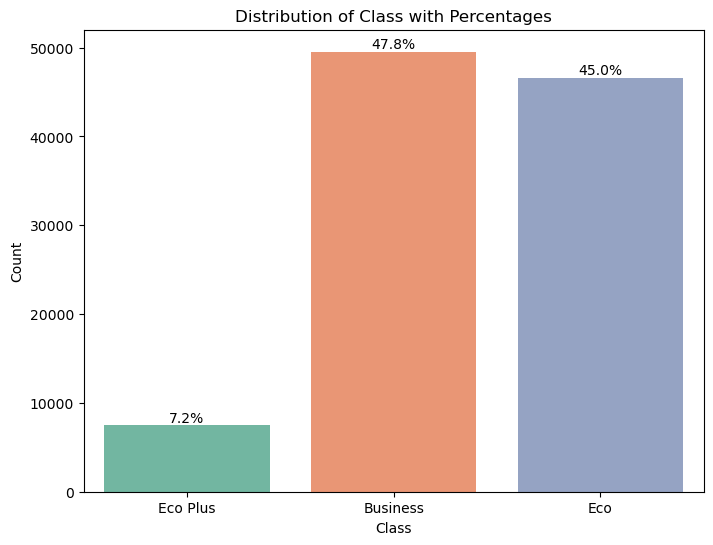

In [14]:
# Plot distribution of class
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Class', palette='Set2')

# Annotate percentages on the bars
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=10)

# Add labels and title
plt.title('Distribution of Class with Percentages')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

#### Distribution of Satisfaction across Travel Classes

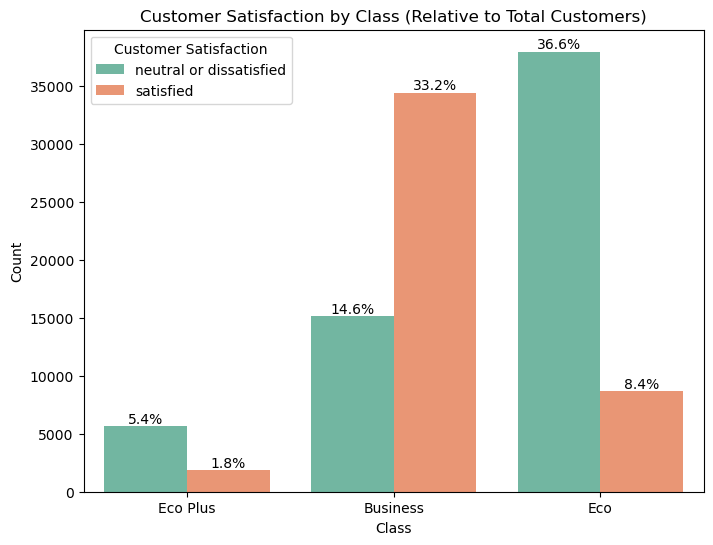

In [15]:
# Plot customer satisfaction by customer type
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Class', hue='satisfaction', palette='Set2')

# Calculate the total number of customers in the entire dataset
total_customers = len(df)

# Annotate percentages on the bars
for p in ax.patches:
    # Get the height of the bar (number of customers for this bar)
    count = p.get_height()
    
    # Calculate the percentage relative to the total number of customers
    percentage = f'{100 * count / total_customers:.1f}%'
    
    # Annotate the percentage on the bar
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=10)

# Add labels and title
plt.title('Customer Satisfaction by Class (Relative to Total Customers)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(title='Customer Satisfaction')
plt.show()

## How do different customer types (loyal vs. disloyal) perceive airline services?

#### Distribution of Customer Types(loyal vs. disloyal)

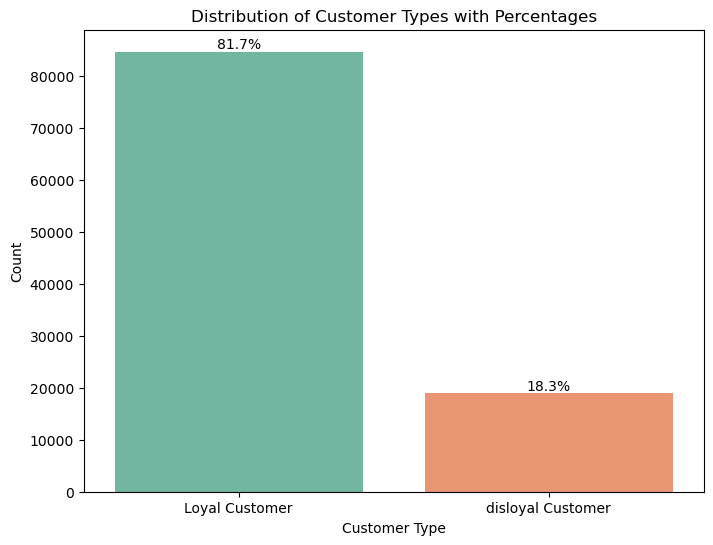

In [16]:
# Plot distribution of customer types
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Customer Type', palette='Set2')

# Annotate percentages on the bars
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=10)

# Add labels and title
plt.title('Distribution of Customer Types with Percentages')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.show()

#### Distribution of Passenger Satisfaction across Customer Types(loyal vs. disloyal)

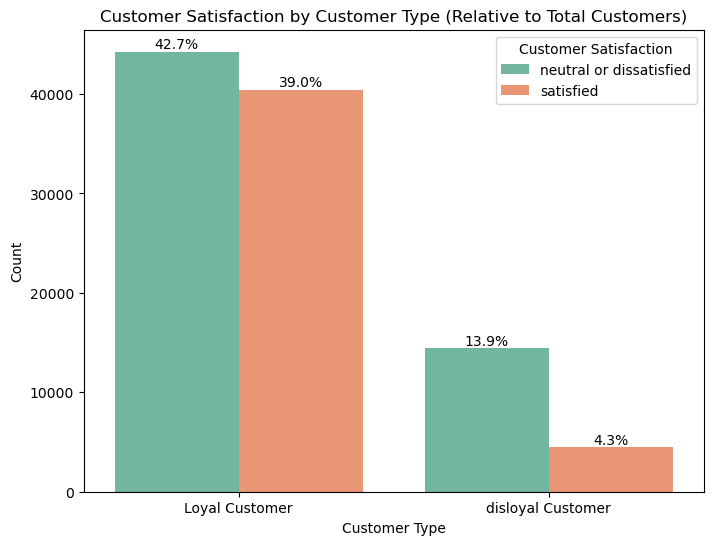

In [17]:
# Plot customer satisfaction by customer type
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Customer Type', hue='satisfaction', palette='Set2')

# Calculate the total number of customers in the entire dataset
total_customers = len(df)

# Annotate percentages on the bars
for p in ax.patches:
    # Get the height of the bar (number of customers for this bar)
    count = p.get_height()
    
    # Calculate the percentage relative to the total number of customers
    percentage = f'{100 * count / total_customers:.1f}%'
    
    # Annotate the percentage on the bar
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=10)

# Add labels and title
plt.title('Customer Satisfaction by Customer Type (Relative to Total Customers)')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.legend(title='Customer Satisfaction')
plt.show()

#### -> In both loyal and disloyal customer types in terms of satisfaction most customers are neutral or dissatisfied

#### -> Let's take a look at the features that affect customer satisfaction

## Encoding Categorical Features

In [18]:
# Instanciate Transformers

le = LabelEncoder()

ohe = OneHotEncoder(sparse_output=False)

df["satisfaction"] = le.fit_transform(df["satisfaction"])


In [19]:
# Encoding all other categorical features

df["Gender"] = le.fit_transform(df["Gender"])
df["Customer Type"] = le.fit_transform(df["Customer Type"])
df["Type of Travel"] = le.fit_transform(df["Type of Travel"])
df["Class"] = ohe.fit_transform(df["Class"].to_frame())

In [20]:
df.head()

Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
0       1              0   13               1    0.0              460   
1       1              1   25               0    1.0              235   
2       0              0   26               0    1.0             1142   
3       0              0   25               0    1.0              562   
4       1              0   61               0    1.0              214   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      3                                  4   
1                      3                                  2   
2                      2                                  2   
3                      2                                  5   
4                      3                                  3   

   Ease of Online booking  Gate location  ...  Seat comfort  \
0                       3              1  ...             5   
1                       3              3  ...             1   
2                       2              2  ...             5   
3                       5              5  ...             2   
4                       3              3  ...             5   

   Inflight entertainment  On-board service  Leg room service  \
0                       5                 4                 3   
1                       1                 1                 5   
2                       5                 4                 3   
3                       2                 2                 5   
4                       3                 3                 4   

   Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                 4                4                 5            5   
1                 3                1                 4            1   
2                 4                4                 4            5   
3                 3                1                 4            2   
4                 4                3                 3            3   

   satisfaction  Total Flight Delay in Minutes  
0             0                           43.0  
1             0                            7.0  
2             1                            0.0  
3             0                           20.0  
4             1                            0.0  

[5 rows x 22 columns]

## What factors most strongly correlate with passenger satisfaction?

In [21]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [22]:
corr_satisfaction = df[numeric_cols].corr()["satisfaction"].sort_values(ascending=False)
corr_satisfaction

satisfaction                         1.000000
Class                                0.503944
Online boarding                      0.503447
Inflight entertainment               0.398203
Seat comfort                         0.349112
On-board service                     0.322450
Leg room service                     0.313182
Cleanliness                          0.305050
Flight Distance                      0.298915
Inflight wifi service                0.284163
Baggage handling                     0.247819
Inflight service                     0.244852
Checkin service                      0.235914
Food and drink                       0.209659
Ease of Online booking               0.171507
Age                                  0.137040
Gender                               0.012356
Gate location                        0.000449
Departure/Arrival time convenient   -0.051718
Total Flight Delay in Minutes       -0.054548
Customer Type                       -0.187558
Type of Travel                    

#### The features with the strongest positive correlations to satisfaction are:

#### -> Class (0.504)
#### -> Online boarding (0.503)
#### -> Inflight entertainment (0.398)
#### -> Seat comfort (0.349)
#### -> On-board service (0.322)

#### These would be the most important factors to focus on for improving customer satisfaction.

#### The features with moderate positive correlations include leg room service, cleanliness, flight distance, inflight wifi service, baggage handling, Inflight service, Checkin service, Food and drink and Ease of Online booking.

#### The features with low positive correlations include Age, Gender and Gate location

#### Departure/arrival time convenience, total flight delay, Customer Type and Type of Travel had weak negative correlations, indicating they are less influential on satisfaction.

### Checking for and dealing with multicollinearity using a heatmap

In [23]:
plt.figure(figsize=(20,10))
sns.heatmap(df.drop(columns=["satisfaction"]).corr(), annot=True)
plt.title("Correlation Matrix")
plt.show();

In [24]:
corr_matrix = df[numeric_cols].corr()

# Identify highly correlated pairs
high_corr_pairs = [(col1, col2) for col1 in corr_matrix.columns for col2 in corr_matrix.columns if abs(corr_matrix[col1][col2]) > 0.7 and col1 != col2]

# Print the highly correlated pairs
for pair in high_corr_pairs:
    print(f"Highly correlated pair: {pair[0]} and {pair[1]}, correlation = {corr_matrix[pair[0]][pair[1]]:.2f}")


Highly correlated pair: Inflight wifi service and Ease of Online booking, correlation = 0.72
Highly correlated pair: Ease of Online booking and Inflight wifi service, correlation = 0.72


#### -> I will not drop any of the two columns Ease of Online booking and Inflight wifi service as they are essentially different

## MODELLING

In [25]:
# Define the target vector(y) and feature matrix(X)
X = df.drop(columns="satisfaction", axis=1)
y = df["satisfaction"]

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Standardizing The Data

In [26]:
# Initializing the Scaler
scaler = StandardScaler()

# Fitting the scaler on the training Data and Transforming it
# Ensure the scaled data has consistent structure during training and testing by Converting the scaled arrays back to pandas DataFrames with the original column names
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

#Transforming the test data using the same parameters
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

### BASELINE MODEL

### Logistic Regression Model

In [27]:
# Training Baseline Model

# Create model
baseline_lr_model = LogisticRegression(random_state=42, max_iter=500)

# Fit model
baseline_lr_model.fit(X_train_scaled, y_train)

# Predict
baseline_prediction = baseline_lr_model.predict(X_test_scaled)

# Test Accuracy, precision, recall, f1 score
baseline_accuracy = accuracy_score(y_test, baseline_prediction)
baseline_precision = precision_score(y_test, baseline_prediction)
baseline_recall = recall_score(y_test, baseline_prediction)
baseline_f1_score = f1_score(y_test, baseline_prediction)

print(f"Baseline Model Accuracy: {baseline_accuracy}")
print(f"Baseline model Precision: {baseline_precision}")
print(f"Baseline Model Recall: {baseline_recall}")
print(f"Baseline F1 Score: {baseline_f1_score}");

Baseline Model Accuracy: 0.8728220473961098
Baseline model Precision: 0.8721778395276137
Baseline Model Recall: 0.831090026478376
Baseline F1 Score: 0.851138353765324


In [28]:
print("Classification Report")
print(classification_report(y_test, baseline_prediction));

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     11655
           1       0.87      0.83      0.85      9064

    accuracy                           0.87     20719
   macro avg       0.87      0.87      0.87     20719
weighted avg       0.87      0.87      0.87     20719



In [29]:
# Confusion Matrix for Logistic Regression
cm_logreg = confusion_matrix(y_test, baseline_prediction)
cm_logreg_display = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=baseline_lr_model.classes_)
cm_logreg_display.plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.show();

### Support Vector Machine Model

In [30]:
# Create a Support Vector Machine Model

svm_model = SVC(kernel="rbf", C=1, gamma="scale", random_state=42)

# Fit Model

svm_model.fit(X_train_scaled, y_train)

# Predict

svm_model_predict = svm_model.predict(X_test_scaled)

# Test Accuracy, recall, precision, f1_score

svm_accuracy = accuracy_score(y_test, svm_model_predict)
svm_recall = recall_score(y_test, svm_model_predict)
svm_precision = precision_score(y_test, svm_model_predict)
svm_f1_score = f1_score(y_test, svm_model_predict)

print(f"Support Vector Machine Accuracy: {svm_accuracy}")
print(f"Support Vector Machine Recall: {svm_recall}")
print(f"Support Vector Machine Precision: {svm_precision}")
print(f"Support Vector Machine F1 Score: {svm_f1_score}")

Support Vector Machine Accuracy: 0.955354988175105
Support Vector Machine Recall: 0.935458958517211
Support Vector Machine Precision: 0.9614468760630457
Support Vector Machine F1 Score: 0.9482748979477716


In [31]:
print("Classification Report")
print(classification_report(y_test, svm_model_predict))

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     11655
           1       0.96      0.94      0.95      9064

    accuracy                           0.96     20719
   macro avg       0.96      0.95      0.95     20719
weighted avg       0.96      0.96      0.96     20719



In [32]:
# Confusion Matrix for Support Vector Machine
cm_svm = confusion_matrix(y_test, svm_model_predict)
cm_svm_display = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm_model.classes_)
cm_svm_display.plot()
plt.title("Confusion Matrix - Support Vector Machine")
plt.show();

### Random Forest Model

In [33]:
# Create a Random Forest Model

rf_model = RandomForestClassifier(random_state=42)

# Fit Model

rf_model.fit(X_train_scaled, y_train)

# Predict

rf_model_predict = rf_model.predict(X_test_scaled)

# Test Accuracy, recall, precision, f1_score

rf_accuracy = accuracy_score(y_test, rf_model_predict)
rf_recall = recall_score(y_test, rf_model_predict)
rf_precision = precision_score(y_test, rf_model_predict)
rf_f1_score = f1_score(y_test, rf_model_predict)

print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"Random Forest Recall: {rf_recall}")
print(f"Random Forest Precision: {rf_precision}")
print(f"Random Forest F1 Score: {rf_f1_score}")

Random Forest Accuracy: 0.9623533954341426
Random Forest Recall: 0.9393203883495146
Random Forest Precision: 0.9736962488563586
Random Forest F1 Score: 0.956199460916442


In [34]:
print("Classification Report")
print(classification_report(y_test, rf_model_predict))

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     11655
           1       0.97      0.94      0.96      9064

    accuracy                           0.96     20719
   macro avg       0.96      0.96      0.96     20719
weighted avg       0.96      0.96      0.96     20719



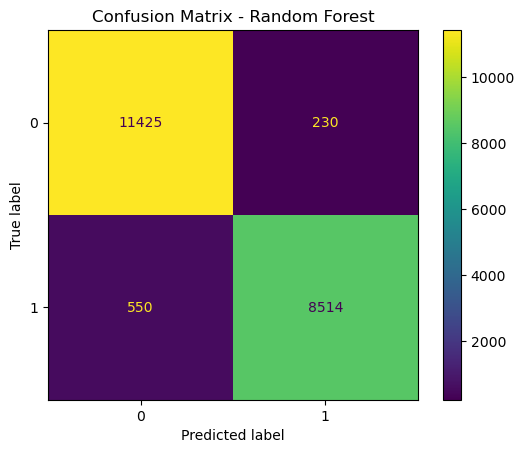

In [35]:
# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, rf_model_predict)
cm_rf_display = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_model.classes_)
cm_rf_display.plot()
plt.title("Confusion Matrix - Random Forest")
plt.show();

### HyperParameter Tuning (Random Forest)

In [36]:
# Define Hyperparameters

param_grid = {
    'n_estimators': [300, 400, 500],  
    'max_depth': [20, 30, None],    
    'min_samples_split': [2, 3, 4],  
    'min_samples_leaf': [1, 2, 3]     
}

# Create Random Forest Model

rf_model_tuned = RandomForestClassifier(random_state=42)

# Create GridSearchCV object

grid_search = GridSearchCV(estimator=rf_model_tuned, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=1, verbose=2)

# Fit The Grid Search to the data

grid_search.fit(X_train_scaled, y_train)

# Make predictions on test set with the tuned model

rf_tuned_predictions = grid_search.predict(X_test_scaled)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  27.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  27.2s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  25.9s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  25.8s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  25.5s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=  34.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=  36.8s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=  34.2s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=  34.2s
[CV] END max_depth=20, min_sa

In [37]:
# Get the best hyperparameters

best_params = grid_search.best_params_
print(f"Best HyperParameters: {best_params}")

Best HyperParameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 300}


In [38]:
# Evaluate the tuned Random Forest Model
# Test Accuracy, recall, precision, f1_score

rf_tuned_accuracy = accuracy_score(y_test, rf_tuned_predictions)
rf_tuned_recall = recall_score(y_test, rf_tuned_predictions)
rf_tuned_precision = precision_score(y_test, rf_tuned_predictions)
rf_tuned_f1_score = f1_score(y_test, rf_tuned_predictions)

print(f"Random Forest Accuracy: {rf_tuned_accuracy}")
print(f"Random Forest Recall: {rf_tuned_recall}")
print(f"Random Forest Precision: {rf_tuned_precision}")
print(f"Random Forest F1 Score: {rf_tuned_f1_score}")

Random Forest Accuracy: 0.9625464549447367
Random Forest Recall: 0.9396513680494263
Random Forest Precision: 0.973816601875143
Random Forest F1 Score: 0.9564289724873667


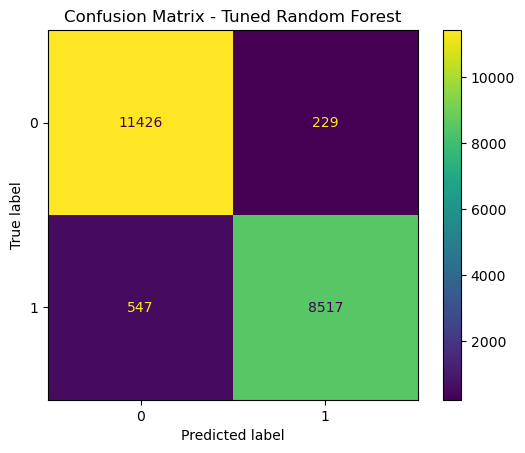

In [39]:
# Confusion Matrix for Tuned Random Forest
cm_rf_tuned = confusion_matrix(y_test, rf_tuned_predictions)
disp_rf_tuned = ConfusionMatrixDisplay(confusion_matrix=cm_rf_tuned, display_labels=grid_search.best_estimator_.classes_)
disp_rf_tuned.plot()
plt.title('Confusion Matrix - Tuned Random Forest')
plt.show()

#### Hypertuned random forest model performs slightly better than the random forest model

### Saving the Model

In [40]:
# Save the entire GridSearchCV object

joblib.dump(grid_search, 'tuned_random_forest_model.pkl')

['tuned_random_forest_model.pkl']

### Predictive Findings

#### What factors lead to airline customer satisfaction?

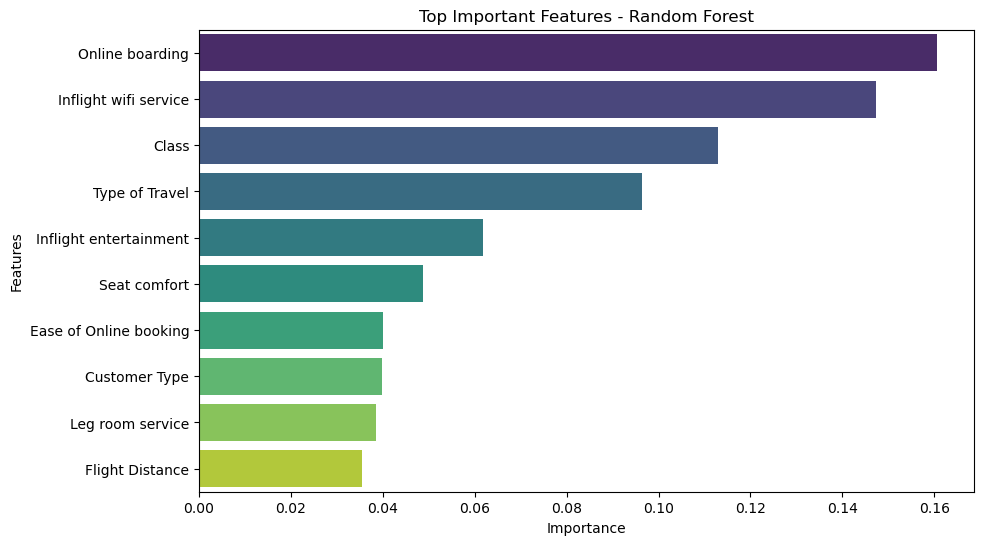

In [58]:
# Get best/important features from my tuned random forest model

feature_importances = grid_search.best_estimator_.feature_importances_

# Creating a DataFrame to display feature importances

feature_importance_df = pd.DataFrame({'Feature':X_train.columns, 'Importance':feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the top N important Features

top_n_features = 10
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(top_n_features), palette='viridis')
plt.title("Top Important Features - Random Forest")
plt.ylabel("Features")
plt.xlabel("Importance")
plt.show();

## TESTING MODEL ON UNSEEN DATA

In [42]:
# wrangle Dataset

df_test = wrangle("test.csv")
df_test.head()

Gender      Customer Type  Age   Type of Travel     Class  Flight Distance  \
0  Female     Loyal Customer   52  Business travel       Eco              160   
1  Female     Loyal Customer   36  Business travel  Business             2863   
2    Male  disloyal Customer   20  Business travel       Eco              192   
3    Male     Loyal Customer   44  Business travel  Business             3377   
4  Female     Loyal Customer   49  Business travel       Eco             1182   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      5                                  4   
1                      1                                  1   
2                      2                                  0   
3                      0                                  0   
4                      2                                  3   

   Ease of Online booking  Gate location  ...  Seat comfort  \
0                       3              4  ...             3   
1                       3              1  ...             5   
2                       2              4  ...             2   
3                       0              2  ...             4   
4                       4              3  ...             2   

   Inflight entertainment  On-board service  Leg room service  \
0                       5                 5                 5   
1                       4                 4                 4   
2                       2                 4                 1   
3                       1                 1                 1   
4                       2                 2                 2   

   Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                 5                2                 5            5   
1                 4                3                 4            5   
2                 3                2                 2            2   
3                 1                3                 1            4   
4                 2                4                 2            4   

              satisfaction  Total Flight Delay in Minutes  
0                satisfied                           94.0  
1                satisfied                            0.0  
2  neutral or dissatisfied                            0.0  
3                satisfied                            6.0  
4                satisfied                           20.0  

[5 rows x 22 columns]

### Inspecting Data

In [43]:
# Printing shape of my test dataframe

df_test.shape

(25893, 22)

In [44]:
# Checking my DataFrame information

df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25893 entries, 0 to 25975
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25893 non-null  object 
 1   Customer Type                      25893 non-null  object 
 2   Age                                25893 non-null  int64  
 3   Type of Travel                     25893 non-null  object 
 4   Class                              25893 non-null  object 
 5   Flight Distance                    25893 non-null  int64  
 6   Inflight wifi service              25893 non-null  int64  
 7   Departure/Arrival time convenient  25893 non-null  int64  
 8   Ease of Online booking             25893 non-null  int64  
 9   Gate location                      25893 non-null  int64  
 10  Food and drink                     25893 non-null  int64  
 11  Online boarding                    25893 non-null  int64  


### Data Cleaning

In [45]:
# Checking for duplicates

df_test.duplicated().sum()

0

In [46]:
# Checking for null values

df_test.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
satisfaction                         0
Total Flight Delay in Minutes        0
dtype: int64

### Encoding Categorical Features

In [47]:
# le transformer i.e, label encoder was already instanciated when training

df_test["satisfaction"] = le.fit_transform(df_test["satisfaction"])

In [48]:
# Encoding all other categorical features

df_test["Gender"] = le.fit_transform(df_test["Gender"])
df_test["Customer Type"] = le.fit_transform(df_test["Customer Type"])
df_test["Type of Travel"] = le.fit_transform(df_test["Type of Travel"])
df_test["Class"] = ohe.fit_transform(df_test["Class"].to_frame())

In [49]:
df_test.head()

Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
0       0              0   52               0    0.0              160   
1       0              0   36               0    1.0             2863   
2       1              1   20               0    0.0              192   
3       1              0   44               0    1.0             3377   
4       0              0   49               0    0.0             1182   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      5                                  4   
1                      1                                  1   
2                      2                                  0   
3                      0                                  0   
4                      2                                  3   

   Ease of Online booking  Gate location  ...  Seat comfort  \
0                       3              4  ...             3   
1                       3              1  ...             5   
2                       2              4  ...             2   
3                       0              2  ...             4   
4                       4              3  ...             2   

   Inflight entertainment  On-board service  Leg room service  \
0                       5                 5                 5   
1                       4                 4                 4   
2                       2                 4                 1   
3                       1                 1                 1   
4                       2                 2                 2   

   Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                 5                2                 5            5   
1                 4                3                 4            5   
2                 3                2                 2            2   
3                 1                3                 1            4   
4                 2                4                 2            4   

   satisfaction  Total Flight Delay in Minutes  
0             1                           94.0  
1             1                            0.0  
2             0                            0.0  
3             1                            6.0  
4             1                           20.0  

[5 rows x 22 columns]

In [50]:
# Define my feature matrix

X_test_test = df_test.drop(columns="satisfaction", axis=1)

In [51]:
# Define target vector

y_test_test = df_test["satisfaction"]

In [52]:
# Transform X_test_test
# Scaler was earlier instanciated
# Ensure the scaled data has consistent structure during training and testing by Converting the scaled arrays back to pandas DataFrames with the original column names

X_test_test_scaled = pd.DataFrame(scaler.transform(X_test_test), columns=X_test_test.columns) 

### Load Model and make predictions

In [53]:
# load my trained model

loaded_model = joblib.load('tuned_random_forest_model.pkl')

# predict on the unseen data

y_test_pred = loaded_model.predict(X_test_test_scaled)

### Evaluate model performance

In [54]:
# Classification metrics
print("Accuracy:", accuracy_score(y_test_test, y_test_pred))
print("Precision:", precision_score(y_test_test, y_test_pred, average='weighted'))
print("Recall:", recall_score(y_test_test, y_test_pred, average='weighted'))
print("F1 Score:", f1_score(y_test_test, y_test_pred, average='weighted'))

Accuracy: 0.9631560653458464
Precision: 0.963364986562534
Recall: 0.9631560653458464
F1 Score: 0.9630889615561148


In [55]:
# Confusion Matrix for Tuned Random Forest on test dataset
cm_rf_test = confusion_matrix(y_test_test, y_test_pred)
disp_rf_tuned = ConfusionMatrixDisplay(confusion_matrix=cm_rf_test, display_labels=grid_search.best_estimator_.classes_)
disp_rf_tuned.plot()
plt.title('Confusion Matrix - Tuned Random Forest on Test DataSet')
plt.show()

# Conclusion

In [ ]:
## predictive findings
## predictive recommendations
## business modification suggestions